In [ ]:
#utilities
import re
import numpy as np
import pandas as pd
#plottingz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/ML Project"

/content/drive/MyDrive/ML Project



Selecting random 10000 tweets from dataset

In [ ]:
import pandas
import random

filename = "training.csv"
n = sum(1 for line in open(filename, encoding = 'Latin-1')) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pandas.read_csv(filename, skiprows=skip,encoding = 'Latin-1',names=('target','id','date','flag','username','tweet'))

In [ ]:
df

,target,id,date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467873467,Mon Apr 06 22:36:10 PDT 2009,NO_QUERY,meganminesinger,monkeys??? i just found out you my twin and yo...
2,0,1467900898,Mon Apr 06 22:43:38 PDT 2009,NO_QUERY,SullieSullivan,I don't understand why things get taken away. ...
3,0,1467953733,Mon Apr 06 22:58:37 PDT 2009,NO_QUERY,MonikkaB,@paul_e_wog Wait...is it a game or just episod...
4,0,1468012742,Mon Apr 06 23:15:25 PDT 2009,NO_QUERY,awesome_jordy,being bored at homee
...,...,...,...,...,...,...
9996,4,2193451219,Tue Jun 16 08:28:36 PDT 2009,NO_QUERY,MoonLoh,is Mompreneur. Any moms in biz? come join the ...
9997,4,2193453443,Tue Jun 16 08:28:47 PDT 2009,NO_QUERY,michellepriddle,"@adamsmith_3 sorry there my trout, but no one ..."
9998,4,2193503551,Tue Jun 16 08:32:48 PDT 2009,NO_QUERY,xspit,#iremember the last sunday
9999,4,2193528475,Tue Jun 16 08:34:50 PDT 2009,NO_QUERY,Shash,@linksforluv you betcha!!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    10001 non-null  int64 
 1   id        10001 non-null  int64 
 2   date      10001 non-null  object
 3   flag      10001 non-null  object
 4   username  10001 non-null  object
 5   tweet     10001 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10001, 6)

In [ ]:
df.tweet

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        monkeys??? i just found out you my twin and yo...
2        I don't understand why things get taken away. ...
3        @paul_e_wog Wait...is it a game or just episod...
4                                    being bored at homee 
                               ...                        
9996     is Mompreneur. Any moms in biz? come join the ...
9997     @adamsmith_3 sorry there my trout, but no one ...
9998                           #iremember the last sunday 
9999                           @linksforluv  you betcha!! 
10000                           Loved the USA hockey team 
Name: tweet, Length: 10001, dtype: object

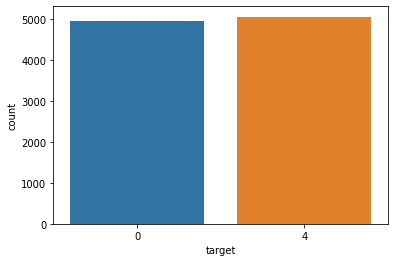

In [ ]:
sns.countplot(x = 'target',data = df) #The dataset is balanced since there are 5000 positive tweets and 5000 negative tweets.

In [ ]:
# dropped columns
df.drop(['id','date','flag','username'], axis=1, inplace=True)

In [ ]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,monkeys??? i just found out you my twin and yo...
2,0,I don't understand why things get taken away. ...
3,0,@paul_e_wog Wait...is it a game or just episod...
4,0,being bored at homee


Data Preprocessing 

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves'] 

def preprocess(textdata , wordLemm):
    processedText = []
  
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
           tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        #STOPWORDS = set(stopwordlist)
        #tweet = " " .join([word for word in str(tweet).split() if word not in STOPWORDS])
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
df.tweet  = preprocess(df.tweet , wordLemm)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df.tweet 

0        USER URL aww that bummer you shoulda got david...
1        monkey just found out you my twin and you wont...
2        don understand why thing get taken away didn h...
3        USER wait is it game or just episode so confused 
4                                    being bored at homee 
                               ...                        
9996     is mompreneur any mom in biz come join the fea...
9997     USER sorry there my trout but no one want to h...
9998                            iremember the last sunday 
9999                                      USER you betcha 
10000                           loved the usa hockey team 
Name: tweet, Length: 10001, dtype: object

In [ ]:

# sklearn
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# converting the 4 in target column to 1 to denote the value 'positive'
df.target = df.target.apply(lambda x: 1 if x==4 else x)

In [ ]:
X = df.tweet
y = df.target

In [ ]:
X

0        USER URL aww that bummer you shoulda got david...
1        monkey just found out you my twin and you wont...
2        don understand why thing get taken away didn h...
3        USER wait is it game or just episode so confused 
4                                    being bored at homee 
                               ...                        
9996     is mompreneur any mom in biz come join the fea...
9997     USER sorry there my trout but no one want to h...
9998                            iremember the last sunday 
9999                                      USER you betcha 
10000                           loved the usa hockey team 
Name: tweet, Length: 10001, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size = 0.8 , test_size = 0.2 ,random_state=42)
# Used 80% data for training and 20% data for testing

In [ ]:
X_testtbl= X_test 

In [ ]:
X_train

1561    USER tried to get an account USER but could ne...
1670                                    really miss them 
6087                   USER thanks think the luck helped 
6669    gonna mhead to bed now my friend can keep my e...
5933    take that back the punk version to rihanna dis...
                              ...                        
5734    im off twitter have freakin exam in the am tim...
5191                     spooky animation short URL dfvp 
5390    USER dating myself here remember the transpare...
860     USER is anyone else having trouble downloading...
7270       sun sun sun want to go to the beach to revise 
Name: tweet, Length: 8000, dtype: object

In [ ]:
#CountVectorizer convert a collection of text documents to a vector of term/token counts
vectoriser = CountVectorizer(ngram_range=(2,3),max_df=0.95, min_df=2,max_features=10000)
count_vectoriser= vectoriser.fit_transform(X_train)
#count_vectoriser= vectoriser.fit_transform(X_train).toarray()
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
#max_df=0.95, min_df=2,max_features=10000,
              

No. of feature_words:  10000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


LOGISTIC REGRESSION

In [ ]:
# Hyper parameter tuning for logistic regression 

In [ ]:
logModel = LogisticRegression()
param_grid = [    
    {
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],     
    }
]
 

        

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='saga')

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_comp = 1000
tsvd = TruncatedSVD(n_components = n_comp  , random_state = 42)
X_train = tsvd.fit_transform(X_train)
X_test = tsvd.transform(X_test)


In [ ]:
logistic = LogisticRegression(C =0.2335, max_iter = 1000, solver= 'saga').fit(X_train,y_train)
#testing
y_pred2= logistic.predict(X_test)
print(confusion_matrix(y_pred2,y_test))

[[577 277]
 [424 723]]


In [ ]:
print(classification_report(y_pred2,y_test))
 

              precision    recall  f1-score   support

           0       0.58      0.68      0.62       854
           1       0.72      0.63      0.67      1147

    accuracy                           0.65      2001
   macro avg       0.65      0.65      0.65      2001
weighted avg       0.66      0.65      0.65      2001



In [ ]:
# dataframe for test and predicted sentiments (from logistic regression model)
LRtest = pd.DataFrame(list(zip(X_testtbl ,y_pred2, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [ ]:
LRtest

,TEST_TWEETS,PREDICTED,ORIGINAL
0,USER that why always had an affinity for the q...,1,1
1,countin down the day till mi bday can wait til...,1,0
2,USER no way USER friday in central park that s...,0,0
3,USER still no good,0,0
4,USER USER wanna sit on the leather chair too f...,1,0
...,...,...,...
1996,USER hey there thanks for accepting my invite ...,1,1
1997,so many farewell happening at work maybe mine ...,0,1
1998,is coming back to ruston tomorrow,0,0
1999,USER tim tailor did the same until 30min ago o...,1,1


In [ ]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    # confusion report
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos','False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1001
           1       0.63      0.72      0.67      1000

    accuracy                           0.65      2001
   macro avg       0.65      0.65      0.65      2001
weighted avg       0.65      0.65      0.65      2001



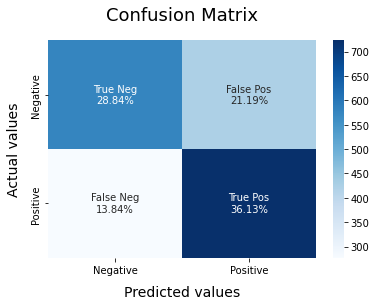

In [ ]:
model_evaluate(logistic)

NAIVE BAYES MODEL

In [ ]:
nb_classifier = BernoulliNB()
#Hyper parameter tuning for bernouli naive bayes
params_NB = { 'alpha': [0.01, 0.1, 0.5, 1.0],}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   #number of cross-validation 
                 verbose=True, 
                 n_jobs=-1)
gs_NB.fit(X_train, y_train)
print('Best Parameters : ',gs_NB.best_params_)
gs_NB.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters :  {'alpha': 0.01}


{'alpha': 0.01}

In [ ]:
BNBmodel = BernoulliNB(alpha=1)
BNBmodel.fit(X_train, y_train)
 
y_predBNB = BNBmodel.predict(X_test)



In [ ]:
#Bernouli naive bayes
print(confusion_matrix(y_predBNB,y_test))
print(classification_report(y_predBNB,y_test))


[[797 635]
 [204 365]]
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      1432
           1       0.36      0.64      0.47       569

    accuracy                           0.58      2001
   macro avg       0.58      0.60      0.56      2001
weighted avg       0.67      0.58      0.60      2001



In [ ]:
Naivetest = pd.DataFrame(list(zip(X_testtbl ,y_predBNB, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [ ]:
Naivetest

,TEST_TWEETS,PREDICTED,ORIGINAL
0,USER that why always had an affinity for the q...,0,1
1,countin down the day till mi bday can wait til...,0,0
2,USER no way USER friday in central park that s...,0,0
3,USER still no good,0,0
4,USER USER wanna sit on the leather chair too f...,0,0
...,...,...,...
1996,USER hey there thanks for accepting my invite ...,0,1
1997,so many farewell happening at work maybe mine ...,0,1
1998,is coming back to ruston tomorrow,0,0
1999,USER tim tailor did the same until 30min ago o...,0,1


In [ ]:
X_train_new, y_train_new = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_train_new[:, 0].min()-1,stop = X_train_new[:, 0].max()+1,step=0.01),
                     np.arange(start = X_train_new[:, 1].min()-1,stop=X_train_new[:, 1].max()+1,step = 0.01)) #created a 2-Dimensional grid structure

In [ ]:
X2.shape

(811, 542)

In [ ]:
X1.shape

(811, 542)

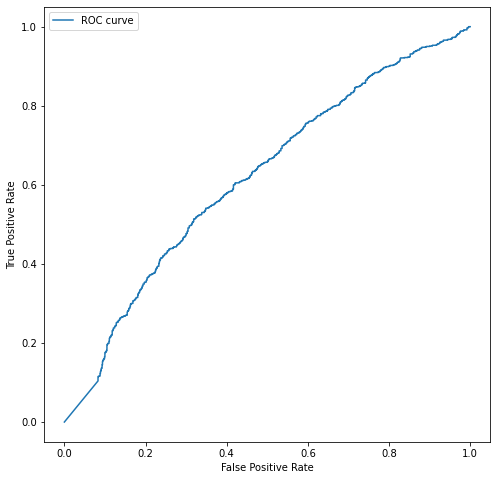

In [ ]:
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,BNBmodel.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

SVM

In [ ]:
#Hyper parameter tunning for SVM
hyper = {
       
     'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
     'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
     'kernel':['rbf','linear','poly']
      
        }

gdsvm=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, cv = 3, verbose=True, n_jobs=-1)

gdsvm.fit(X_train,y_train)
print(gdsvm.best_score_)
print(gdsvm.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
0.6845001303395111
SVC(C=1, gamma=0.1)


In [ ]:
"""
Fitting 3 folds for each of 2 candidates, totalling 6 fits

0.7261252883524593
SVC(kernel='linear')

0.7003755063250252
SVC(gamma=0.1)

0.7238757570907537
SVC(C=1)

"""

In [ ]:
clf = svm.SVC(kernel='linear',gamma=0.1,C=1) 
clf.fit(X_train, y_train)

y_predsvmgrid = clf.predict(X_test)
print(confusion_matrix(y_predsvmgrid,y_test))

[[1333  537]
 [ 695 1436]]


In [ ]:
print(classification_report(y_predsvmgrid,y_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1870
           1       0.73      0.67      0.70      2131

    accuracy                           0.69      4001
   macro avg       0.69      0.69      0.69      4001
weighted avg       0.69      0.69      0.69      4001



In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer

# Custom scorer
target = 0 # class you want to plot
scorer = make_scorer(lambda y_true, y_pred: f1_score(
    y_true, y_pred, 
    labels=None, 
    pos_label=target, 
    average='binary', 
    sample_weight=None))


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, make_scorer
estimator =svm.SVC(kernel='linear',gamma=0.1,C=1) 

# Custom scorer
target = 1 # class you want to plot
scorer = make_scorer(lambda y_true, y_pred: f1_score(
     y_true, y_pred, 
     labels=None, 
     pos_label=target, 
     average='binary', 
     sample_weight=None))

train_sizes, train_scores, test_scores = learning_curve(
    estimator, 
    X_train, y_train, cv=5, scoring=scorer)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
def graphfunctionclass0(title):
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.grid()

  plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")

  plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.title(title)

  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

  plt.legend(loc="best")

In [ ]:
def graphfunctionclass1(title):
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")

  plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")

  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.title(title)

 
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

  plt.legend(loc="best")
  

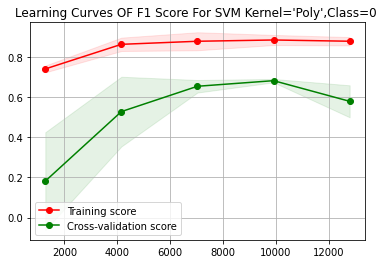

In [ ]:
graphfunctionclass0("Learning Curves OF F1 Score For SVM Kernel='Poly',Class=0 ")

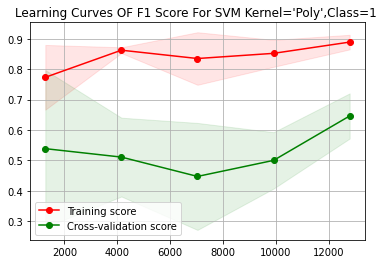

In [ ]:
graphfunctionclass1("Learning Curves OF F1 Score For SVM Kernel='Poly',Class=1 ")

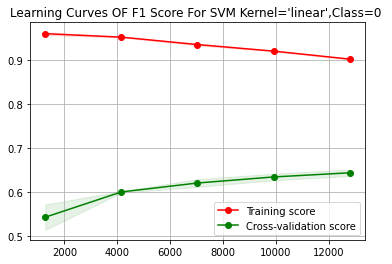

In [ ]:
graphfunctionclass0("Learning Curves OF F1 Score For SVM Kernel='linear',Class=0 ")


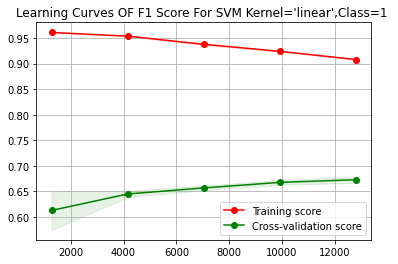

In [ ]:
graphfunctionclass1("Learning Curves OF F1 Score For SVM Kernel='linear',Class=1 ")

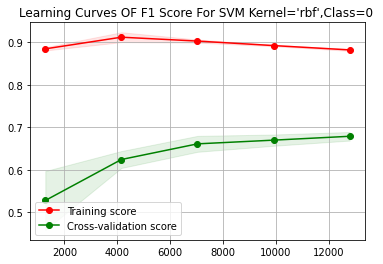

In [ ]:
graphfunctionclass0("Learning Curves OF F1 Score For SVM Kernel='rbf',Class=0 ")

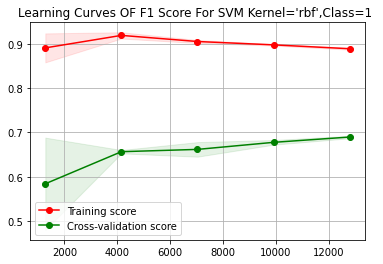

In [ ]:
graphfunctionclass1("Learning Curves OF F1 Score For SVM Kernel='rbf',Class=1 ")

Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)
rfcparam_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rfcparam_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:

clf = RandomForestClassifier(n_estimators = 500,max_features = 'auto', max_depth=8,criterion='gini') 
clf.fit(X_train, y_train)
y_predrfc = clf.predict(X_test)
#from sklearn import metrics 
#print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predrfc))

In [ ]:
print(classification_report(y_predrfc,y_test))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       750
           1       0.74      0.59      0.66      1251

    accuracy                           0.61      2001
   macro avg       0.61      0.62      0.61      2001
weighted avg       0.65      0.61      0.62      2001

